# Amazon-User-Segmentation

# Importing Libraries


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Importing Dataset

In [8]:
dataset=pd.read_csv("Amazon.com cluster model.csv")
x=dataset.iloc[:,[2,4]].values

In [9]:
print(x)

[[ 23 150]
 [ 32 106]
 [ 23  10]
 [ 32  22]
 [ 34 117]
 [ 43   6]
 [ 43 123]
 [ 22 133]
 [ 34 108]
 [ 23  62]
 [ 29 125]
 [ 28  73]
 [ 27  44]
 [ 25  66]
 [ 26  30]
 [ 38  38]
 [ 23 128]
 [ 21 130]
 [ 21  59]
 [ 22  42]
 [ 20   3]
 [ 31  30]
 [ 32  57]
 [ 33  97]
 [ 30  75]
 [ 39  16]
 [ 37   9]
 [ 35 131]
 [ 30 149]
 [ 31  48]
 [ 29  76]
 [ 28 105]
 [ 35  76]
 [ 22  54]
 [ 20 145]
 [ 23 144]
 [ 21 122]
 [ 27  71]
 [ 28 121]
 [ 23 132]
 [ 29  14]
 [ 36  34]
 [ 39 145]
 [ 31  54]
 [ 37  84]
 [ 39  61]
 [ 20  70]
 [ 29 148]
 [ 35  56]
 [ 23  84]
 [ 34  48]
 [ 34   9]
 [ 23  16]
 [ 34  55]
 [ 32  73]
 [ 23 120]
 [ 19  59]
 [ 19  41]
 [ 23   9]
 [ 24 121]
 [ 25 101]
 [ 26 128]
 [ 27   4]
 [ 28  27]
 [ 29  12]
 [ 20 130]
 [ 39 135]
 [ 38  97]
 [ 34  69]
 [ 35  47]
 [ 36  51]
 [ 37 101]
 [ 38  62]
 [ 32 113]
 [ 32 146]
 [ 20  18]
 [ 27 129]
 [ 39 113]
 [ 25  30]
 [ 26 128]
 [ 27 116]
 [ 28  30]
 [ 26  81]
 [ 25 149]
 [ 26 117]
 [ 27  23]
 [ 28  42]
 [ 25  80]
 [ 27  57]
 [ 28 136]
 [ 29  17]

# Optimal number of clusters via Elbow Method

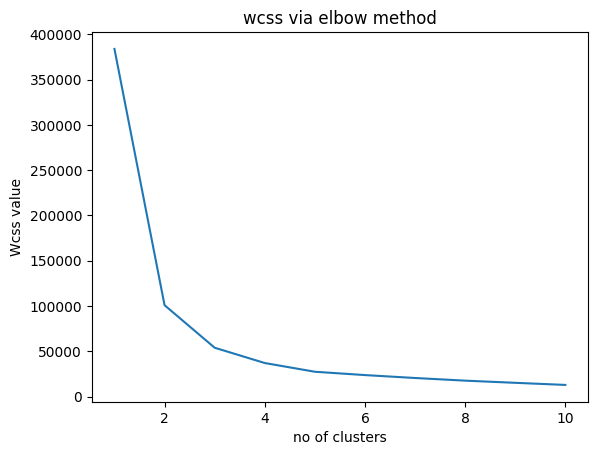

In [10]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=21)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("wcss via elbow method")
plt.xlabel("no of clusters")
plt.ylabel("Wcss value")
plt.show()

# K-Means model Training set

In [11]:
kmeans=KMeans(n_clusters=4,init="k-means++",random_state=42)
y_means=kmeans.fit_predict(x)

In [12]:
print(y_means)

[3 1 2 2 1 2 1 3 1 0 3 0 2 0 2 2 3 3 0 2 2 2 0 1 0 2 2 3 3 0 0 1 0 0 3 3 3
 0 1 3 2 2 3 0 0 0 0 3 0 0 0 2 2 0 0 1 0 2 2 1 1 3 2 2 2 3 3 1 0 0 0 1 0 1
 3 2 3 1 2 3 1 2 0 3 1 2 2 0 0 3 2 1 2 3 0 1 2 1 1 3 2 3 0 0 3 1 0 3 0 1 2
 1 3 0 2 0 2 1 1 1 1 2 0 0 3 1 3 2 0 1 0 0 2 0 0 1 2 0 1 2 2 1 0 0 1 2 1 0
 0 3 1 2 1 2 0 0 1 3 2 2 1 0 0 1 0 2 1 2 0 0 0 1 0 1 2 2 3 2 2 3 3 1 3 1 0
 3 2 0 1 0 1 3 2 1 2 0 3 1 0 3 0 3]


# Visualizing Clusters

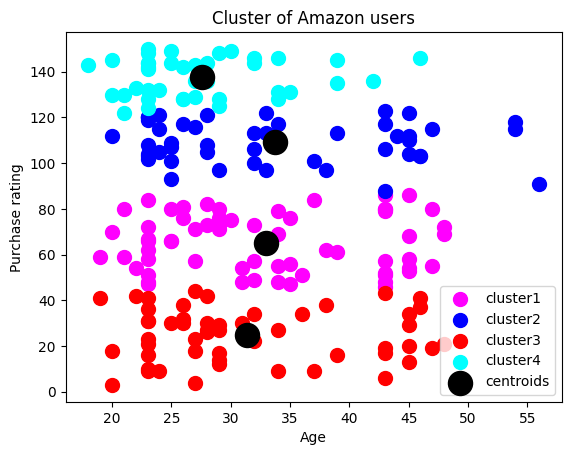

In [13]:
plt.scatter(x[y_means==0,0],x[y_means==0,1],s=100,c='magenta',label="cluster1")
plt.scatter(x[y_means==1,0],x[y_means==1,1],s=100,c='blue',label="cluster2")
plt.scatter(x[y_means==2,0],x[y_means==2,1],s=100,c='red',label="cluster3")
plt.scatter(x[y_means==3,0],x[y_means==3,1],s=100,c='cyan',label="cluster4")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c="black",label="centroids")
plt.title("Cluster of Amazon users")
plt.xlabel("Age")
plt.ylabel("Purchase rating")
plt.legend()
plt.show()